In [7]:
from __future__ import division
import numpy as np
import sys
from scipy import special as sp

In [29]:
#Setup
Msolar = 2e30
f1 = 1e-3
t = np.arange(0,1e4,100)
MA = 2*np.pi*f1*t 
e = 0.5
gamma = np.pi/4
iota = np.pi/8
m0 = 30*Msolar
m1 = 30*Msolar
mu = m0*m1/(m0+m1)
AA = (2*np.pi*f1*(m0+m1))**(2/3) * mu

In [30]:
from scipy import special as sp

nsum = 100

hGW = np.zeros((len(MA), 2))
for n in range(1,nsum+1):
    Jminus2 = sp.jv(n-2,n*e)
    Jminus1 = sp.jv(n-1,n*e)
    Jn = sp.jv(n,n*e)
    Jplus1 = sp.jv(n+1,n*e)
    Jplus2 = sp.jv(n+2,n*e)
    
     
    AJ = Jminus2 - 2*e*Jminus1 + 2*Jn/n + 2*e*Jplus1 - Jplus2
    an = -n*AA*(AJ)*np.cos(n*MA)
    
    BJ = Jminus2 - 2*Jn + Jplus2
    bn = -n*AA*(1-e**2)**(0.5) * BJ * np.sin(n*MA)
    
    cn = 2*AA*Jn*np.cos(n*MA)
    
    hplus = -(1+np.cos(iota))*(an*np.cos(2*gamma) - bn*np.sin(2*gamma)) + (1-np.cos(iota)**2)*cn
    hcross = 2*np.cos(iota)*(bn*np.cos(2*gamma) + an*np.sin(2*gamma))
    
    hGW[:,0] = hGW[:,0] + hplus
    hGW[:,1] = hGW[:,1] + hcross
    

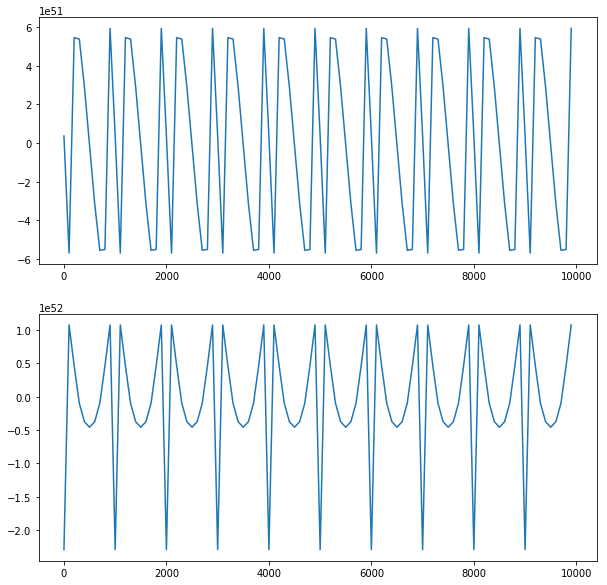

In [31]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((2,1), (0,0)) 
ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1) 


hplus = hGW[:,0]
hcross = hGW[:,1]

ax1.plot(t, hplus)
ax2.plot(t, hcross)